# Assessed Problem #3

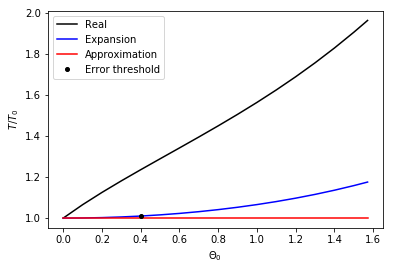

In [10]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from run_kut4 import *
#
p=np.pi
#Define Subroutines
def f(x,y):
    return 2/np.pi/((2*np.cos(x) - 2*np.cos(y)))
def expansion(X):
    return 1+X**2/16+11*X**4/3072
#
X,Y = integrate(f,0,1,np.pi/2,0.1)

plt.plot(X, Y           , 'k-', label = "Real"         )
plt.plot(X, expansion(X), 'b-', label = "Expansion"    )
plt.plot(X,[1]*len(X)   , 'r-', label = "Approximation")

error = 1
for i in X:
    if (error < 1.01 and expansion(i) > 1.01):
        plt.plot(i,expansion(i), 'ko',markersize = 4, label = "Error threshold")
    error = expansion(i)
    
plt.xlabel("$\Theta_0$")
plt.ylabel("$T/T_0$")
plt.legend()
plt.show()


In [6]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
#
p=np.pi
#Define Subroutines
def f(x,y):
    return 2/np.pi/np.sqrt(2*np.cos(x) - 2*np.cos(y))
def expansion(X):
    return 1+X**2/16+11*X**4/3072
#
X = np.arange(0,p/2,0.01)
hrange = []
for O in np.arange(0,p/2,0.001):
    nsum = 0.
    for n in np.arange(0, O, 0.001):
        nsum += f(n,O)
    hrange.append(nsum)

plt.plot(np.arange(0,p/2,0.01), hrange, 'k-', label = "Real")
plt.plot(X, expansion(X), 'b-', label = "Expansion"    )
plt.plot(X,[1]*len(X)   , 'r-', label = "Approximation")

error = 1
for i in X:
    if (error < 1.01 and expansion(i) > 1.01):
        plt.plot(i,expansion(i), 'ko',markersize = 4, label = "Error threshold")
    error = expansion(i)
    
plt.xlabel("$\Theta_0$")
plt.ylabel("$T/T_0$")
plt.legend()
plt.show()

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars


ValueError: x and y must have same first dimension, but have shapes (158,) and (1571,)

In [8]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from romberg import *
#

p=np.pi
#Define Subroutines
def f(y):
    def function(x):
        return 2/np.pi/np.sqrt(2*np.cos(x) - 2*np.cos(y))
    return function
def expansion(X):
    return 1+X**2/16+11*X**4/3072
#
X = np.linspace(0.0,p/2,10)
for x in X:
    fx = f(x)
    y = romberg(fx,0.0,p/2)

print (y)
plt.plot(X, y, 'k-', label = "Real")
plt.plot(X, expansion(X), 'b-', label = "Expansion"    )
plt.plot(X,[1]*len(X)   , 'r-', label = "Approximation")

error = 1
for i in X:
    if (error < 1.01 and expansion(i) > 1.01):
        plt.plot(i,expansion(i), 'ko',markersize = 4, label = "Error threshold")
    error = expansion(i)
    
plt.xlabel("$\Theta_0$")
plt.ylabel("$T/T_0$")
plt.legend()
plt.show()

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


Romberg quadrature did not converge
Romberg quadrature did not converge
Romberg quadrature did not converge
Romberg quadrature did not converge
Romberg quadrature did not converge
Romberg quadrature did not converge
Romberg quadrature did not converge
Romberg quadrature did not converge
Romberg quadrature did not converge


C:\Users\fh225\Downloads\ScientificComputing\Assessment_2\romberg.py:14: RuntimeWarning: invalid value encountered in double_scalars
  r[j] = (const*r[j+1] - r[j])/(const - 1.0)


Romberg quadrature did not converge
None


ValueError: x and y must not be None